<a href="https://colab.research.google.com/github/Bhuvaneshhhh/Sentiment-Analysis-ESG/blob/main/ESG_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESG Sentiment Analysis**
**GOAL:** Analyzing ESG related text from company reports, financial disclosure and media.
We will compare sentiment scores with company's ESG rating. If HIGH ESG rating but NEGATIVE media sentiment, then it's potential greenwashing.

### **Data Colletion: Collecting ESG scores using Yahoo Finance API**

In [ ]:
!pip install yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.0
    Uninstalling lxml-5.3.0:
      Successfully uninstalled lxml-5.3.0


In [ ]:
from yahooquery import Ticker
import pandas as pd

In [ ]:
ticker = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "GE", "PEP", "JPM", "DELL", "JNJ", "IBM", "WMT"]
company = Ticker(ticker)

In [ ]:
esg_data = company.esg_scores
esg_df = pd.DataFrame(esg_data).T

esg_df.reset_index(inplace=True)
esg_df.rename(columns={"index": "symbol"}, inplace=True)
print(esg_df)

   symbol maxAge totalEsg environmentScore socialScore governanceScore  \
0    AAPL  86400    16.79             0.55        7.52            8.72   
1    MSFT  86400    14.23             1.65        7.62            4.96   
2   GOOGL  86400    24.89             2.94       11.74           10.21   
3    AMZN  86400     26.1              8.3       11.05            6.75   
4    META  86400    32.73             2.41       21.64            8.68   
5      GE  86400    32.49            13.44       12.73            6.32   
6     PEP  86400    20.82              7.1        9.64            4.08   
7     JPM  86400     27.3             2.44       14.03           10.83   
8    DELL  86400     15.9             0.63        7.29            7.99   
9     JNJ  86400     20.1             0.94       13.03            6.13   
10    IBM  86400    13.27             1.58        6.68            5.01   
11    WMT  86400    25.26             7.24       11.65            6.38   

   ratingYear ratingMonth highestCont

### **Sentimental Analysis**

#### ***Get ESG News Data***

In [ ]:
!pip install newsapi-python

In [ ]:
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key="a2774e258ab44659ada4a44f4a805e04")
articles = newsapi.get_everything(q="ESG sustainability", language="en", sort_by="relevancy")

news_df = pd.DataFrame(articles["articles"])[["title", "description", "url"]]
print(news_df.head())

                                               title  \
0  Facing Sustainability Backlash With Strength &...   
1  Gen Z Cares About Sustainability: Make Your Br...   
2  18 Strategies Businesses Can Use To Prepare Fo...   
3  Firms use earnings guidance to mitigate comple...   
4  Industrial sustainability with private wireles...   

                                         description  \
0  Worked in sustainability or ESG for less than ...   
1  ESG (Environmental, Social and Governance) was...   
2  Companies should prioritize transparent report...   
3  Companies in the United States are turning to ...   
4  Discussion of the benefits of private wireless...   

                                                 url  
0  https://www.forbes.com/sites/solitairetownsend...  
1  https://www.forbes.com/sites/jefffromm/2025/01...  
2  https://www.forbes.com/councils/forbesfinancec...  
3  https://phys.org/news/2025-01-firms-guidance-m...  
4  https://www.techradar.com/pro/industrial-susta..

#### ***Perform Sentiment Analysis***

In [ ]:
!pip install nltk

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

news_df["sentiment_score"] = news_df["title"].apply(lambda x: sia.polarity_scores(str(x))["compound"])
print(news_df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               title  \
0  Facing Sustainability Backlash With Strength &...   
1  Gen Z Cares About Sustainability: Make Your Br...   
2  18 Strategies Businesses Can Use To Prepare Fo...   
3  Firms use earnings guidance to mitigate comple...   
4  Industrial sustainability with private wireles...   

                                         description  \
0  Worked in sustainability or ESG for less than ...   
1  ESG (Environmental, Social and Governance) was...   
2  Companies should prioritize transparent report...   
3  Companies in the United States are turning to ...   
4  Discussion of the benefits of private wireless...   

                                                 url  sentiment_score  
0  https://www.forbes.com/sites/solitairetownsend...           0.4939  
1  https://www.forbes.com/sites/jefffromm/2025/01...           0.4588  
2  https://www.forbes.com/councils/forbesfinancec...           0.0000  
3  https://phys.org/news/2025-01-firms

In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
print(sentiment_pipeline("Apple Inc. claims to be carbon neutral by 2030, but reports suggest otherwise."))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9965565204620361}]


### **Detect Greenwashing**

In [ ]:
company_list = ["Apple", "Microsoft", "Google", "Meta", "Amazon", "General Electric", "PepsiCo", "Dell Technologies", "IBM", "JPMorgan Chase", "Johnson & Johnson", "Walmart" ]
company_sentiments = {}

for company in company_list:
    articles = newsapi.get_everything(q=f"{company} ESG",
                                      language="en",
                                      sort_by="relevancy")

    news_df = pd.DataFrame(articles["articles"])[["title", "description"]]
    news_df["sentiment_score"] = news_df["title"].apply(lambda x: sia.polarity_scores(str(x))["compound"])
    company_sentiments[company] = news_df["sentiment_score"].mean()


In [ ]:
company_symbol_map = {
    "Apple": "AAPL",
    "Microsoft": "MSFT",
    "Google": "GOOGL",
    "Amazon": "AMZN",
    "Meta": "META",
    "General Electric": "GE",
    "PepsiCo": "PEP",
    "JPMorgan Chase": "JPM",
    "Dell Technologies": "DELL",
    "Johnson & Johnson": "JNJ",
    "IBM": "IBM",
    "Walmart": "WMT"
}

sentiment_df = pd.DataFrame(list(company_sentiments.items()), columns=["company", "average_sentiment"])
sentiment_df["symbol"] = sentiment_df["company"].map(company_symbol_map)

esg_df = esg_df.merge(sentiment_df, on="symbol", how="left")

esg_df["greenwashing_risk"] = esg_df["totalEsg"] - esg_df["average_sentiment"]

print(esg_df[["symbol", "totalEsg", "average_sentiment", "greenwashing_risk"]])


   symbol totalEsg  average_sentiment greenwashing_risk
0    AAPL    16.79          -0.145385         16.935385
1    MSFT    14.23          -0.147577         14.377577
2   GOOGL    24.89          -0.151062         25.041062
3    AMZN     26.1          -0.094364         26.194364
4    META    32.73          -0.139780          32.86978
5      GE    32.49           0.213500           32.2765
6     PEP    20.82           0.250000             20.57
7     JPM     27.3           0.156785         27.143215
8    DELL     15.9          -0.164139         16.064139
9     JNJ     20.1          -0.109923         20.209923
10    IBM    13.27           0.095450          13.17455
11    WMT    25.26           0.013777         25.246223


### **Data Visualisation**

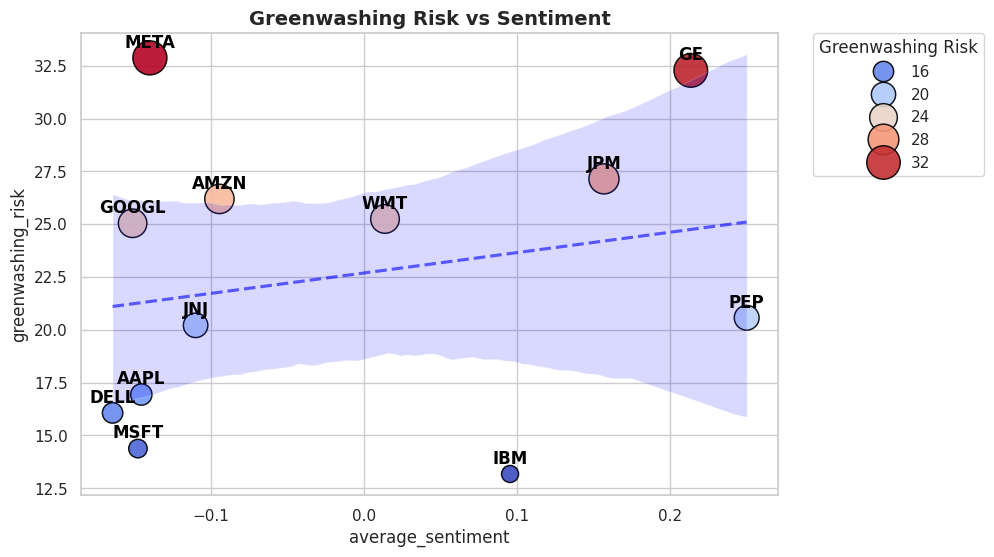

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

esg_df[['average_sentiment', 'greenwashing_risk']] = esg_df[['average_sentiment', 'greenwashing_risk']].apply(pd.to_numeric, errors='coerce')
esg_df = esg_df.dropna(subset=['average_sentiment', 'greenwashing_risk'])

sns.set(style="whitegrid")

plt.figure(figsize=(9, 6))

scatter = sns.scatterplot(
    data=esg_df, x='average_sentiment', y='greenwashing_risk',
    size='greenwashing_risk', sizes=(150, 600),
    hue='greenwashing_risk', palette='coolwarm',
    edgecolor='black', alpha=0.9
)

for i, row in esg_df.iterrows():
    plt.text(row['average_sentiment'], row['greenwashing_risk'] + 0.5,
             row['symbol'], fontsize=12, ha='center', fontweight='bold', color='black')

plt.title('Greenwashing Risk vs Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Average Sentiment (More Negative → Left)', fontsize=12)
plt.ylabel('Greenwashing Risk (Higher → More Risk)', fontsize=12)

plt.legend(title="Greenwashing Risk", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

if not esg_df.empty:
    sns.regplot(
        data=esg_df, x='average_sentiment', y='greenwashing_risk',
        scatter=False, color='blue', line_kws={"linestyle": "dashed", "alpha": 0.6}
    )

plt.show()



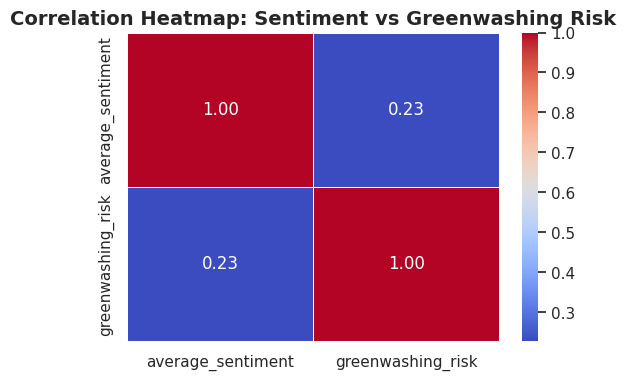

In [ ]:
corr_matrix = esg_df[['average_sentiment', 'greenwashing_risk']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap: Sentiment vs Greenwashing Risk", fontsize=14, fontweight="bold")
plt.show()
